# Medical Condition Interaction Variables

The purpose of this workbook is to better understand the effect of pre-existing medical conditions on mortality risk from Covid-19. When I saw the relatively small coefficient for the medcond_yn variable in the original regression, I thought that we probably needed to employ the use of interaction variables to specify the effect of having a medical condition for different groups. It is reasonable to assume that the presence of a medical condition will present a different degree of risk for a 20 year-old, a 50-year old, and an 80 year-old.

We can simply multiply the values of our medcond_yn variable with our dummy classification variables for age and ethnicity. The resulting effect is two regression coefficients per age / ethnicity group. One for those with, and one for those without a pre-existing medical condition. For further reading, check out https://www.theanalysisfactor.com/interaction-dummy-variables-in-linear-regression/

We will be analyzing the effect of pre-existing conditions for both age and ethnicity groups

In [1]:
#Import dependencies
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/regression_dataframe.csv')
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,...,70 - 79 Years,80+ Years,Asian,Black,Hispanic,Native,Other,Pacific Islander,White,LPM Prediction
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.040195
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.040195
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.079077
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.040195
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.079077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.030958
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,-0.007925
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.019345
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.048610


## VIsualization
First, let's look at how deaths are distributed among those with pre-existing conditions

,Deaths,Cases,Pct
Without,1671.0,206628,0.808700
With,27498.0,251103,10.950885


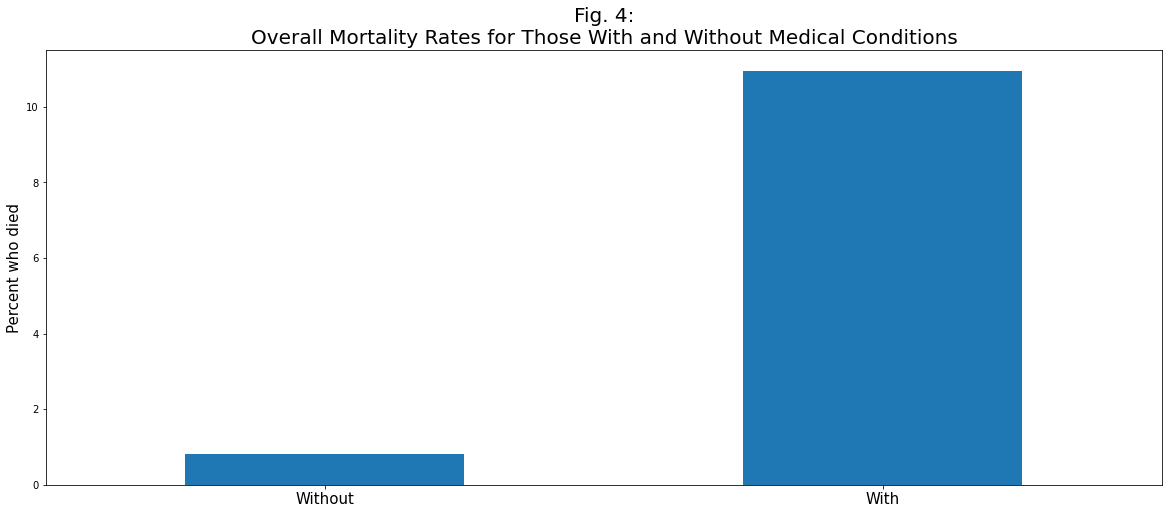

In [3]:
deaths = df.groupby('medcond_yn').sum()['death_yn']
counts = df.groupby('medcond_yn').count()['death_yn']
frame = pd.DataFrame({'Deaths': deaths, 'Cases': counts})
frame['Pct'] = 100 * (frame['Deaths'] / frame['Cases'])
frame.index =['Without', 'With']
frame['Pct'].plot(kind='bar', figsize=(20,8))
plt.ylabel('Percent who died', fontsize = 15)
plt.tick_params(labelrotation = 0)
plt.xticks( fontsize = 15)
plt.title('Fig. 4:\nOverall Mortality Rates for Those With and Without Medical Conditions', fontsize = 20)
plt.savefig('../Images/Regression/fig4_medcond_distribution.png', facecolor = 'white')
frame

## Are we Underrepresenting the Effect of Pre-existing Conditions?
So 10 percent of those with a pre-existing condition died... yet the regression coefficient from the first regression was only 0.03, more than 3 times as small as 0.10. Why? 

Let's take a closer look at the exact risk factors for mortality

In [4]:
# Declare which columns will be interacted with
columns = ['20 - 29 Years', '30 - 39 Years',
       '40 - 49 Years', '50 - 59 Years', '60 - 69 Years', '70 - 79 Years',
       '80+ Years', 'Asian', 'Black', 'Hispanic', 'Native', 'Other',
       'Pacific Islander']

interactions = []
# Multiply each column with medcond_yn to create a new column
for col in columns:
    colName = col + '_interact'
    df[colName] = df[col] * df['medcond_yn']
    interactions.append(colName)
df[interactions]   


,20 - 29 Years_interact,30 - 39 Years_interact,40 - 49 Years_interact,50 - 59 Years_interact,60 - 69 Years_interact,70 - 79 Years_interact,80+ Years_interact,Asian_interact,Black_interact,Hispanic_interact,Native_interact,Other_interact,Pacific Islander_interact
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
457727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Perform analysis
exog = ['sex'] + columns + interactions + ['medcond_yn']
x = df[exog]
x = sm.add_constant(x)

y = df['death_yn']

model = sm.OLS(y, x, hasconst = True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               death_yn   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4387.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:51:09   Log-Likelihood:                 50099.
No. Observations:              457731   AIC:                        -1.001e+05
Df Residuals:                  457702   BIC:                        -9.982e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0142      0.001    -11.650      0.000      -0.017      -0.012
sex                           0.0266      0.001     41.286      0.000       0.025       0.028
20 - 29 Years                 0.0009      0.001      0.591      0.554      -0.002       0.004
30 - 39 Years                 0.0008      0.002      0.521      0.602      -0.002       0.004
40 - 49 Years                 0.0040      0.002      2.412      0.016       0.001       0.007
50 - 59 Years                 0.0090      0.002      5.139      0.000       0.006       0.012
60 - 69 Years                 0.0225      0.002     10.399      0.000       0.018       0.027
70 - 79 Years                 0.0646      0.003     20.410      0.000       0.058       0.071
80+ Years                     0.2093      0.004     47.752      0.000       0.201       0.218
Asian                         0.0058      0.003      2.205      0.027       0.001       0.011
Black                         0.0090      0.002      4.981      0.000       0.005       0.012
Hispanic                      0.0031      0.001      2.712      0.007       0.001       0.005
Native                        0.0145      0.009      1.546      0.122      -0.004       0.033
Other                         0.0028      0.003      1.036      0.300      -0.002       0.008
Pacific Islander              0.0170      0.007      2.506      0.012       0.004       0.030
20 - 29 Years_interact        0.0053      0.002      2.143      0.032       0.000       0.010
30 - 39 Years_interact        0.0123      0.003      4.831      0.000       0.007       0.017
40 - 49 Years_interact        0.0231      0.003      9.057      0.000       0.018       0.028
50 - 59 Years_interact        0.0545      0.003     21.325      0.000       0.050       0.060
60 - 69 Years_interact        0.1140      0.003     39.800      0.000       0.108       0.120
70 - 79 Years_interact        0.1809      0.004     48.310      0.000       0.174       0.188
80+ Years_interact            0.2350      0.005     48.375      0.000       0.226       0.245
Asian_interact                0.0963      0.004     25.116      0.000       0.089       0.104
Black_interact                0.0674      0.002     30.879      0.000       0.063       0.072
Hispanic_interact             0.0552      0.002     33.525      0.000       0.052       0.058
Native_interact               0.0535      0.011      4.683      0.000       0.031       0.076
Other_interact                0.0369      0.004      9.661      0.000       0.029       0.044
Pacific Islander_interact     0.0067      0.009      0.769      0.442      -0.010       0.024
medcond_yn                   -0.0273      0.002    -13.696      0.000      -0.031      -0.023
===========================================================================

# Interpretation
Woah! Big change in coefficients!

In the first regression, we estimated that being 80+ years old increased an individual's likelihood of death by around 40%. Now that we have distinguished between those with a medical condition and those without, that number has dropped to 20%. However, 80 year olds *with* a medical condition have an estimated mortality risk of *over* 40% (20.75 + 23.54). 

Where we before estimated that 60-69 year-old patients had an almost 10% increased risk of death, we now have them at just 2%! However, those with a medical condition have around a 14% (2.23 + 11.46) risk of dying!

The inclusion of this interaction variable has really enhanced the specificity of our results. Let's visualize each age group's mortality, ***taking pre-existing conditions into consideration*** 

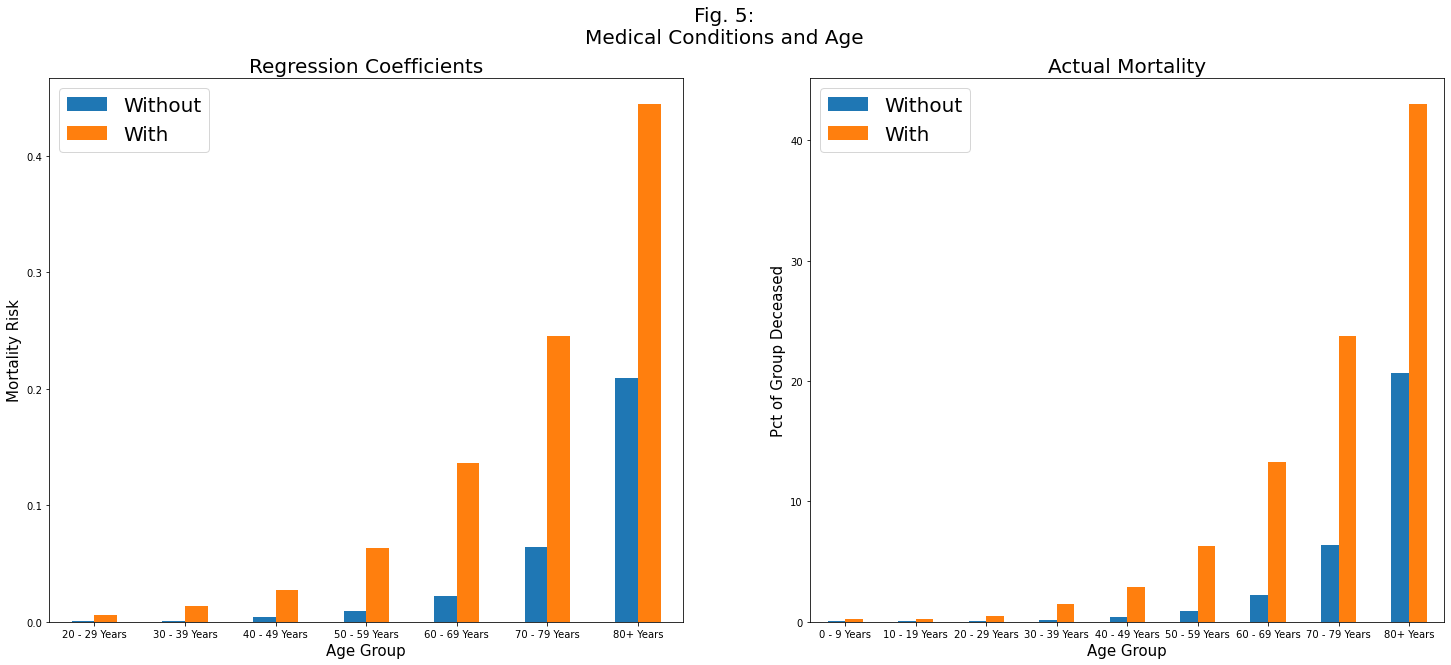

In [6]:
# Plot Setup:
fig, axs = plt.subplots(1, 2, figsize = (25,10))
fig.suptitle('Fig. 5:\nMedical Conditions and Age', fontsize = 20)

axs[0].set_ylabel('Mortality Risk', fontsize = 15)
axs[1].set_ylabel('Pct of Group Deceased', fontsize = 15)
axs[0].set_title('Regression Coefficients', fontsize = 20)
axs[1].set_title('Actual Mortality', fontsize = 20)


# Coefficients:
Without = res.params.loc['20 - 29 Years': '80+ Years']
With = res.params.loc['20 - 29 Years_interact':'80+ Years_interact']

coefficients = pd.DataFrame({'Without': Without.values, 'With': Without.values + With.values})
coefficients.set_index(Without.index, inplace = True)

coefficients.plot(kind='bar', ax = axs[0])
axs[0].tick_params(labelrotation = 0)
axs[0].set_xlabel('Age Group', fontsize = 15)
axs[0].legend(['Without', 'With'], fontsize = 20)
#Actual Values:
# Groupby age group and medical condition - compare share of death
sums = df.groupby(['age_group', 'medcond_yn']).sum()['death_yn']
counts = df.groupby(['age_group', 'medcond_yn']).count()['death_yn']
compare = pd.merge(sums, counts, left_index = True, right_index = True).rename(columns = {'death_yn_x': 'Total Deaths',
                                                                                         'death_yn_y': 'Total Cases'})
compare['Pct Dead'] = (compare['Total Deaths'] / compare['Total Cases']) * 100
compare = compare['Pct Dead'].unstack().rename(columns= {0: 'Without', 1: 'With'})

compare.plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Age Group', fontsize = 15)
axs[1].tick_params(labelrotation = 0)
axs[1].legend(['Without', 'With'], fontsize = 20)

plt.savefig('../Images/Regression/fig5_age_and_medcond.png', facecolor = 'white')
plt.show()

# Interpretation
So we already knew from the first regression that age has what looks to be an exponential relationship with mortality risk. Now, we can see that this exponential-looking pattern holds true for the ***risk added*** by the presence of pre-existing conditions.
## Now let's copy-paste the above code and analyze ethnicity instead of age

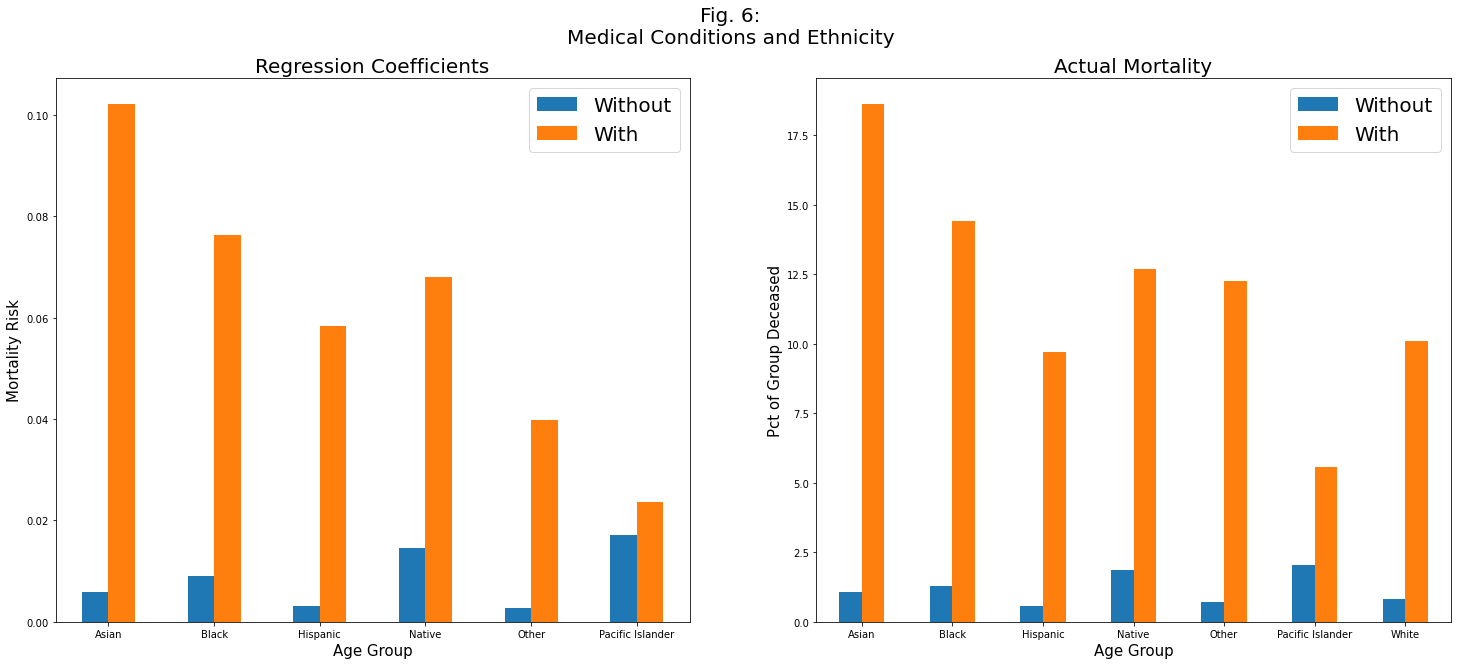

In [7]:
# Plot Setup:
fig, axs = plt.subplots(1, 2, figsize = (25,10))
fig.suptitle('Fig. 6:\nMedical Conditions and Ethnicity', fontsize = 20)

axs[0].set_ylabel('Mortality Risk', fontsize = 15)
axs[1].set_ylabel('Pct of Group Deceased', fontsize = 15)
axs[0].set_title('Regression Coefficients', fontsize = 20)
axs[1].set_title('Actual Mortality', fontsize = 20)


# Coefficients:
Without = res.params.loc['Asian': 'Pacific Islander']
With = res.params.loc['Asian_interact':'Pacific Islander_interact']

coefficients = pd.DataFrame({'Without': Without.values, 'With': Without.values + With.values})
coefficients.set_index(Without.index, inplace = True)

coefficients.plot(kind='bar', ax = axs[0])
axs[0].tick_params(labelrotation = 0)
axs[0].set_xlabel('Age Group', fontsize = 15)
axs[0].legend(['Without', 'With'], fontsize = 20)
#Actual Values:
# Groupby age group and medical condition - compare share of death
sums = df.groupby(['Race and ethnicity (combined)', 'medcond_yn']).sum()['death_yn']
counts = df.groupby(['Race and ethnicity (combined)', 'medcond_yn']).count()['death_yn']
compare = pd.merge(sums, counts, left_index = True, right_index = True).rename(columns = {'death_yn_x': 'Total Deaths',
                                                                                         'death_yn_y': 'Total Cases'})
compare['Pct Dead'] = (compare['Total Deaths'] / compare['Total Cases']) * 100
compare = compare['Pct Dead'].unstack().rename(columns= {0: 'Without', 1: 'With'})

compare.plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Age Group', fontsize = 15)
axs[1].tick_params(labelrotation = 0)
axs[1].legend(['Without', 'With'], fontsize = 20)

plt.savefig('../Images/Regression/fig6_ethnicity_and_medcond.png', facecolor = 'white')
plt.show()

# Interpretation
So this graph tells  us two things:
1. Asian and Black people see the highest increased risk of mortality with the presence of pre-existing conditions
2. The presence of pre-existing medical conditions is a much higher risk factor than what the first model initally suggested 

## Why the big change?
Recall that in the first model, the presence of a medical condition was estimated to increase mortality risk by just 3 percent. When specifying by ethnicity and age, however, we see much larger coefficients for the presence of a medical condition. Before, we had not properly specified the model somehow. But how?

One possibility is that the majority of those with medical conditions are young, and they see very little increased risk. If the majority of patients in this dataset are young, then an unspecified regression analysis would see that the majority of those with medical conditions do **not** pass away.

Another possibility is that the majority of those with medical conditions are very *old*, and the regression has "confused" the effect of age with the effect of medical condition. If the majority of those with medical conditions are 80+ years old, and 80+ year-olds see the highest rate of mortality, then an unspecified regression analysis would see a much stronger correlation between *age* and mortality than between the presence of medical conditions and mortality.

Lets look at the distribution of medical conditions by age and see if either of these guesses are correct.

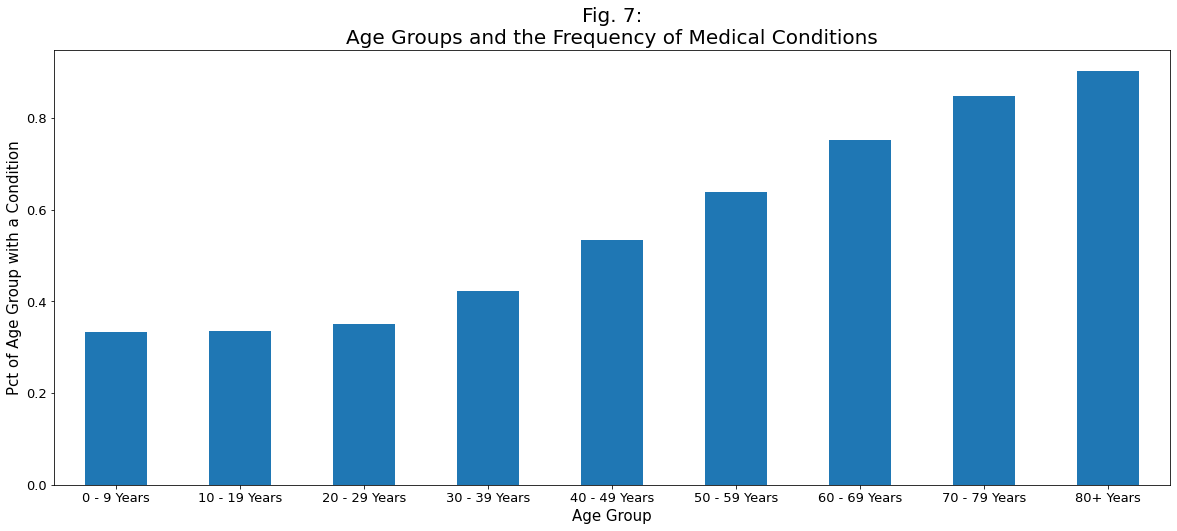

In [8]:
# Group by age group and show intra-group frequency of medical conditions
sums = df.groupby('age_group').sum()['medcond_yn']
counts = df.groupby('age_group').count()['medcond_yn']

totals = pd.DataFrame({'Total With Conditions': sums, 'Total': counts})
totals['Pct'] = totals['Total With Conditions'] / totals['Total']
totals['Pct'].plot(kind = 'bar', figsize = (20,8))
totals['Pct of Pop'] = totals['Total'] / df.shape[0]
plt.ylabel('Pct of Age Group with a Condition', fontsize = 15)
plt.xlabel('Age Group', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Fig. 7:\nAge Groups and the Frequency of Medical Conditions', fontsize = 20)
plt.savefig('../Images/Regression/fig7_age_medcond_distribution.png', facecolor = 'white')
plt.show()

## Age Bias
It does, in fact, look like the presence of medical conditions is heavily skewed with age. Not only that, but the majority of observations in this dataset are of individuals younger than 60 years old. In other words, most observations are of people for whom the presence of a medical condition increases mortality risk by less than 10%

This explains why we see such a huge disparity in the medcond_yn coefficients before and after including the interaction variables.

By specifying the intra-group presence of medical conditions, we have painted a much clearer picture of the causes of mortality 

## Predictive Power
Now that we have re-specified our model, we can check its predictive power again.

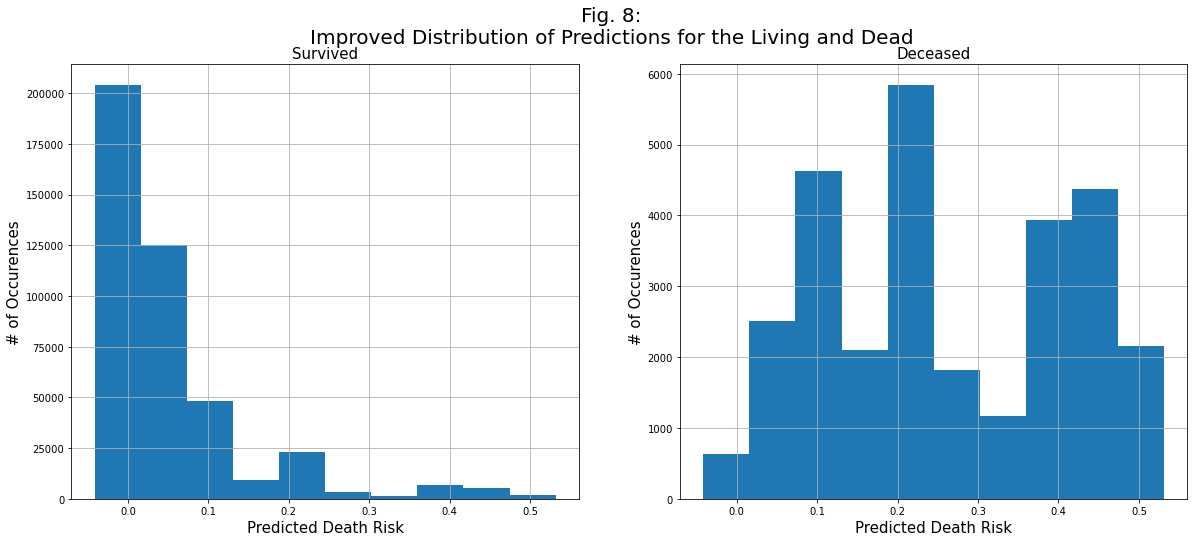

In [9]:
# Replace current prediction estimates (from the last regression)
df['LPM Prediction'] = res.predict(x)
deaths = df[df['death_yn'] == 1]
lives = df[df['death_yn'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Fig. 8:\nImproved Distribution of Predictions for the Living and Dead', fontsize = 20)
lives['LPM Prediction'].hist(ax = axs[0])
deaths['LPM Prediction'].hist(ax = axs[1])
for ax in axs:
    ax.set_xlabel('Predicted Death Risk', fontsize = 15)
    ax.set_ylabel('# of Occurences', fontsize = 15)

axs[0].set_title('Survived', fontsize = 15)
axs[1].set_title('Deceased', fontsize = 15)

plt.savefig('../Images/Regression/fig8_improved_prediction_distribution.png')
plt.show()

## Better fit
Our prediction distribution looks **very** similar to the one from the first regression (Fig. 3) However, it is more skewed in the correct directions (left for the survived, right for the deceased). We have improved our model!
# Changes over time
Thus far, we have not taken into account that the treatment options for Covid-19 have greatly improved over time. If we isolate the effect of time's passing, it will better enable us to identify the causal factors behind mortality risk.

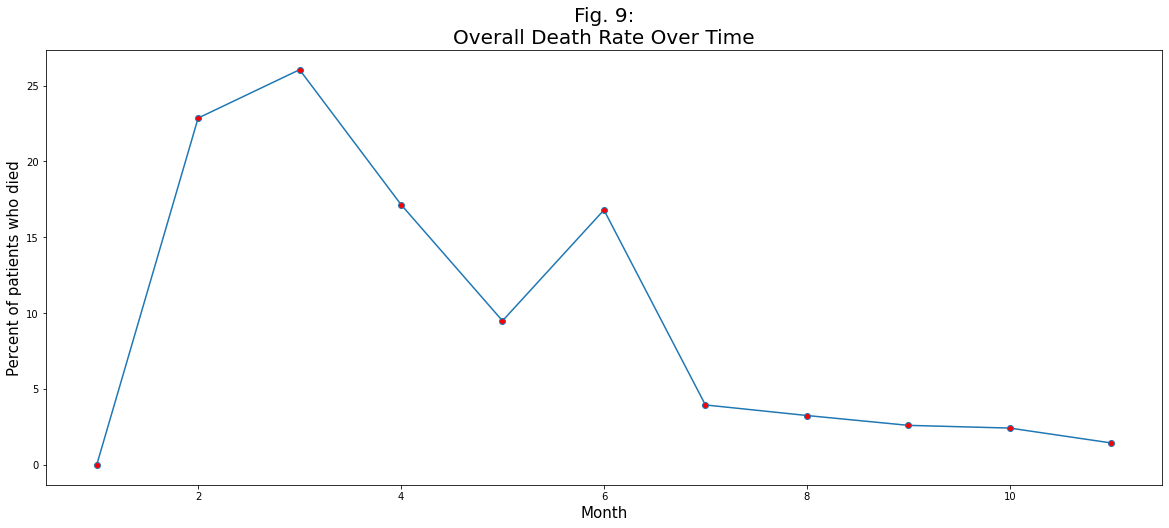

In [10]:
# First, let's visualize it
dead = df.groupby('month').sum()['death_yn']
counts = df.groupby('month').count()['death_yn']
deaths_by_month = pd.DataFrame({'Deaths': dead, 'Cases': counts})
deaths_by_month['Pct'] = (deaths_by_month['Deaths'] / deaths_by_month['Cases']) * 100
deaths_by_month['Pct'].plot(figsize = (20,8), marker = 'o', markerfacecolor = 'r')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Percent of patients who died', fontsize = 15)
plt.title('Fig. 9:\nOverall Death Rate Over Time', fontsize = 20)
plt.savefig('../Images/Regression/fig9_death_over_time.png')

Woah! Pretty Dramatic. Maybe this is because of the initial flood of cases and the over-capacity of hospitals. Let's check!

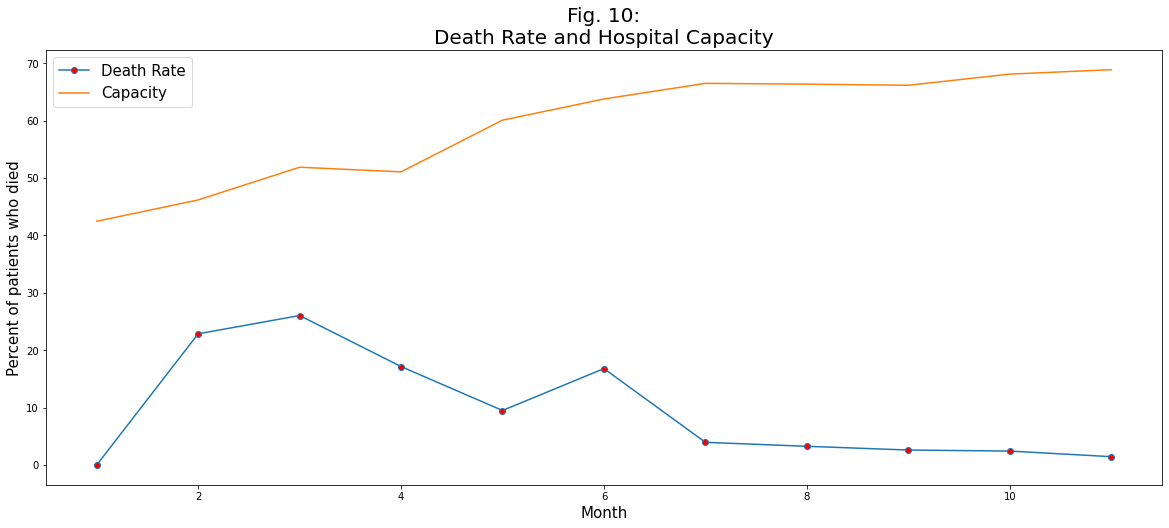

In [11]:
# Grab the occupancy column from the main dataframe
cap = pd.read_csv('../Data/clean_data.csv')['inpatient__occupancy']
df['Hospital Capacity'] = cap
cap_by_month = df.groupby('month').mean()['Hospital Capacity'] * 100

# We got the column. Now let's plot it
deaths_by_month['Pct'].plot(figsize = (20,8), marker = 'o', markerfacecolor = 'r')
cap_by_month.plot()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Percent of patients who died', fontsize = 15)
plt.title('Fig. 10:\nDeath Rate and Hospital Capacity', fontsize = 20)
plt.legend(['Death Rate', 'Capacity'], fontsize = 15)
plt.savefig('../Images/Regression/fig10_death_and_capacity.png')

It seems that over time, hospital occupancy has gone up, and the death rate has gone down in spite of this fact. Now, let's quantify the time effect by introducing some time-fixed-effects into our model. Not only will this reflect the trend seen above in Fig. 10, but it will allow the regression software to specify its other coefficients even more accurately due to the mitigation of ommitted variable bias.

In [12]:
months = pd.get_dummies(df['month'])
months

# This for loop is the same as a merge. 
for i in range(2, 12):
    x['month ' + str(i)] = months[i]

x

,const,sex,20 - 29 Years,30 - 39 Years,40 - 49 Years,50 - 59 Years,60 - 69 Years,70 - 79 Years,80+ Years,Asian,...,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11
0,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,1.0,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
457727,1.0,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
457728,1.0,1.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
457729,1.0,0.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
model = sm.OLS(y, x, hasconst = True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               death_yn   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     3892.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:51:15   Log-Likelihood:                 59769.
No. Observations:              457731   AIC:                        -1.195e+05
Df Residuals:                  457692   BIC:                        -1.190e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0433      0.053     -0.816      0.415      -0.147       0.061
sex                           0.0240      0.001     38.058      0.000       0.023       0.025
20 - 29 Years                -0.0068      0.001     -4.743      0.000      -0.010      -0.004
30 - 39 Years                -0.0095      0.002     -6.183      0.000      -0.012      -0.006
40 - 49 Years                -0.0073      0.002     -4.473      0.000      -0.010      -0.004
50 - 59 Years                -0.0032      0.002     -1.879      0.060      -0.007       0.000
60 - 69 Years                 0.0104      0.002      4.919      0.000       0.006       0.015
70 - 79 Years                 0.0551      0.003     17.777      0.000       0.049       0.061
80+ Years                     0.1950      0.004     45.406      0.000       0.187       0.203
Asian                        -0.0104      0.003     -4.010      0.000      -0.015      -0.005
Black                        -0.0052      0.002     -2.954      0.003      -0.009      -0.002
Hispanic                     -0.0164      0.001    -14.399      0.000      -0.019      -0.014
Native                       -0.0003      0.009     -0.032      0.974      -0.018       0.018
Other                        -0.0037      0.003     -1.393      0.164      -0.009       0.001
Pacific Islander             -0.0059      0.007     -0.884      0.377      -0.019       0.007
20 - 29 Years_interact        0.0022      0.002      0.883      0.377      -0.003       0.007
30 - 39 Years_interact        0.0082      0.003      3.294      0.001       0.003       0.013
40 - 49 Years_interact        0.0196      0.002      7.852      0.000       0.015       0.024
50 - 59 Years_interact        0.0475      0.003     18.946      0.000       0.043       0.052
60 - 69 Years_interact        0.1027      0.003     36.615      0.000       0.097       0.108
70 - 79 Years_interact        0.1640      0.004     44.705      0.000       0.157       0.171
80+ Years_interact            0.2126      0.005     44.654      0.000       0.203       0.222
Asian_interact                0.0874      0.004     23.267      0.000       0.080       0.095
Black_interact                0.0625      0.002     29.241      0.000       0.058       0.067
Hispanic_interact             0.0515      0.002     31.893      0.000       0.048       0.055
Native_interact               0.0640      0.011      5.721      0.000       0.042       0.086
Other_interact                0.0290      0.004      7.746      0.000       0.022       0.036
Pacific Islander_interact     0.0190      0.009      2.227      0.026       0.002       0.036
medcond_yn                   -0.0284      0.002    -14.550      0.000      -0.032      -0.025
month 2                       0.1613      0.059      2.741      0.006      

At first glance, it looks like the size of most of our coefficients have remained the same

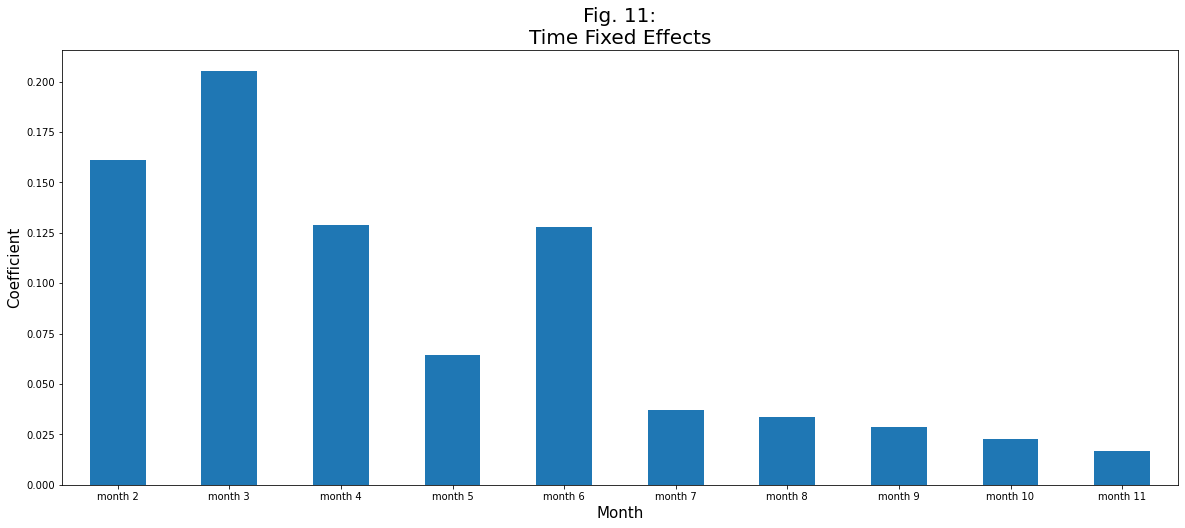

In [14]:
res.params.loc['month 2': 'month 11'].plot(kind = 'bar', figsize = (20,8))
plt.tick_params(labelrotation = 0)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Coefficient', fontsize = 15)
plt.title('Fig. 11:\nTime Fixed Effects', fontsize = 20)
plt.savefig('../Images/Regression/fig11_time_fixed_effects')

# Model Respecification
By introducing these time-fixed-effects, we have certainly changed the regression coefficients. Let's see if our above observations continue to hold water after re-specifying the model 

***Note***: *The below code is a copy-paste from the code that generated figures 5 and 6*

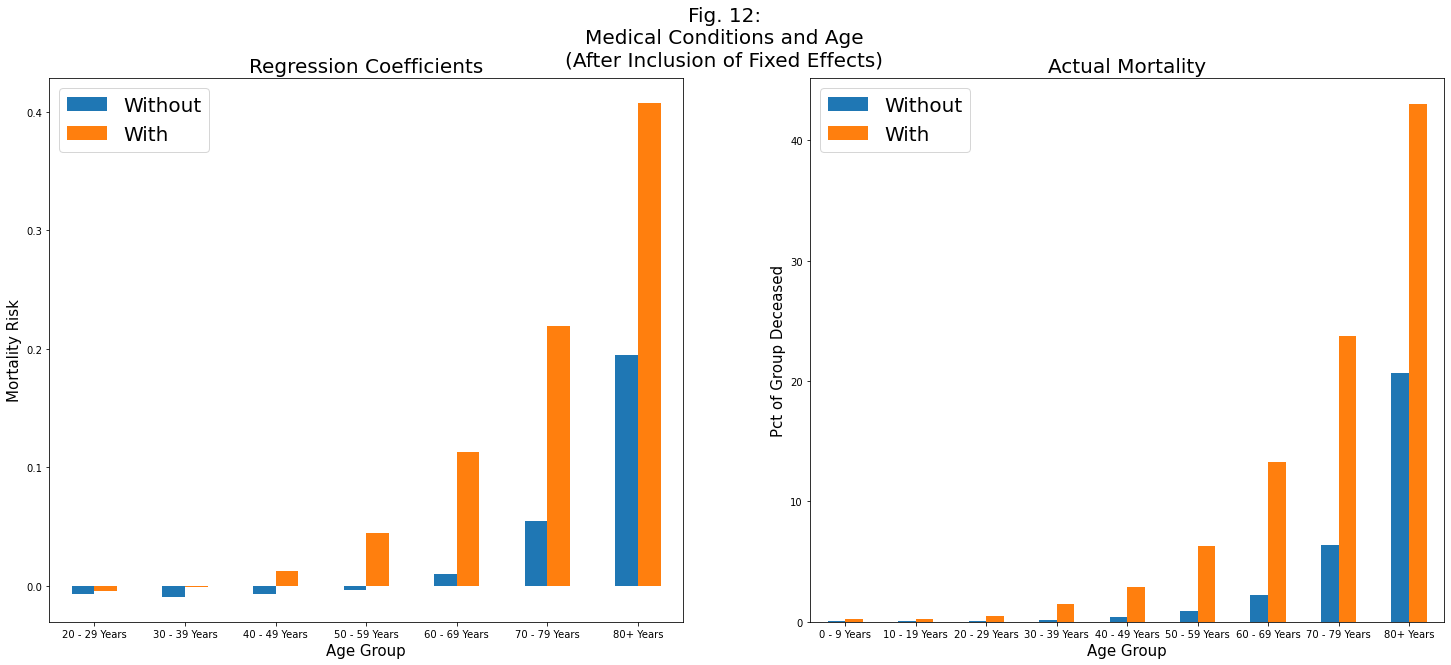

In [18]:
# Plot Setup:
fig, axs = plt.subplots(1, 2, figsize = (25,10))
fig.suptitle('Fig. 12:\nMedical Conditions and Age\n(After Inclusion of Fixed Effects)', fontsize = 20)

axs[0].set_ylabel('Mortality Risk', fontsize = 15)
axs[1].set_ylabel('Pct of Group Deceased', fontsize = 15)
axs[0].set_title('Regression Coefficients', fontsize = 20)
axs[1].set_title('Actual Mortality', fontsize = 20)


# Coefficients:
Without = res.params.loc['20 - 29 Years': '80+ Years']
With = res.params.loc['20 - 29 Years_interact':'80+ Years_interact']

coefficients = pd.DataFrame({'Without': Without.values, 'With': Without.values + With.values})
coefficients.set_index(Without.index, inplace = True)

coefficients.plot(kind='bar', ax = axs[0])
axs[0].tick_params(labelrotation = 0)
axs[0].set_xlabel('Age Group', fontsize = 15)
axs[0].legend(['Without', 'With'], fontsize = 20)
#Actual Values:
# Groupby age group and medical condition - compare share of death
sums = df.groupby(['age_group', 'medcond_yn']).sum()['death_yn']
counts = df.groupby(['age_group', 'medcond_yn']).count()['death_yn']
compare = pd.merge(sums, counts, left_index = True, right_index = True).rename(columns = {'death_yn_x': 'Total Deaths',
                                                                                         'death_yn_y': 'Total Cases'})
compare['Pct Dead'] = (compare['Total Deaths'] / compare['Total Cases']) * 100
compare = compare['Pct Dead'].unstack().rename(columns= {0: 'Without', 1: 'With'})

compare.plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Age Group', fontsize = 15)
axs[1].tick_params(labelrotation = 0)
axs[1].legend(['Without', 'With'], fontsize = 20)

plt.savefig('../Images/Regression/fig12_age_and_medcond_post_FE.png', facecolor = 'white')
plt.show()

The pattern holds!

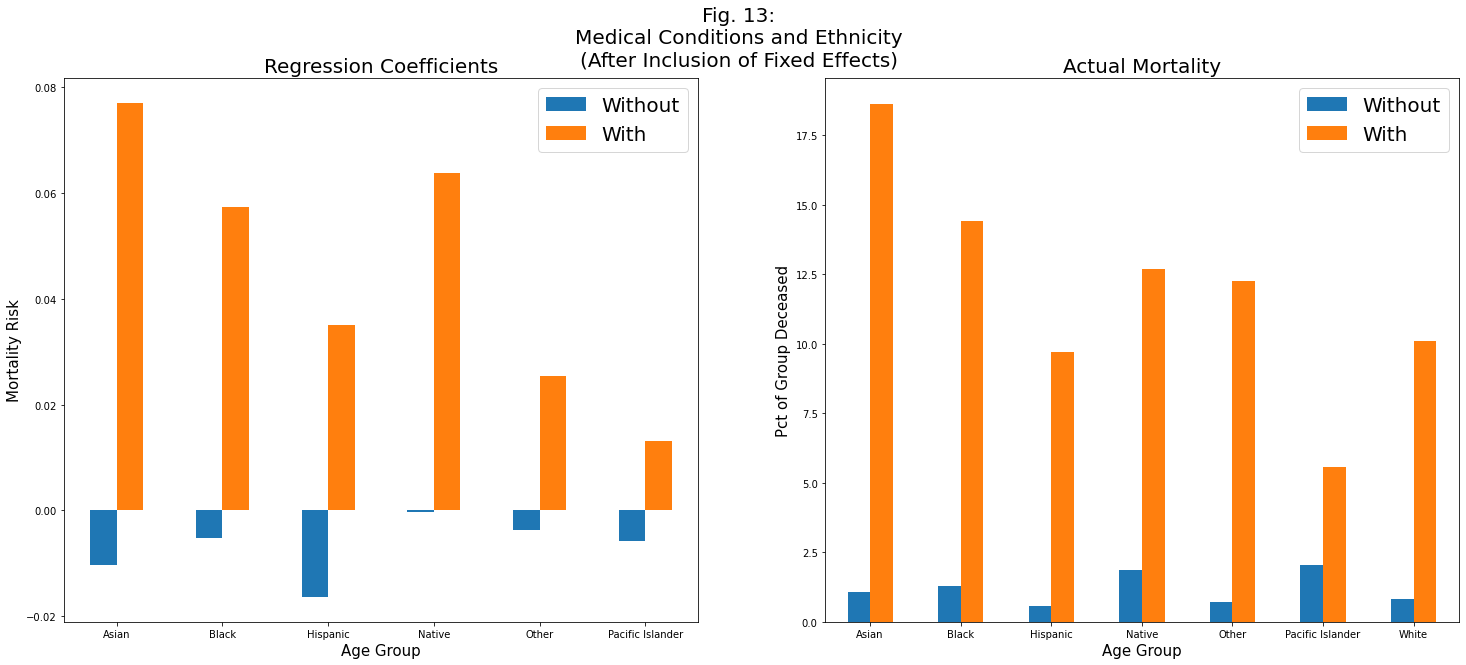

In [16]:
# Plot Setup:
fig, axs = plt.subplots(1, 2, figsize = (25,10))
fig.suptitle('Fig. 13:\nMedical Conditions and Ethnicity\n(After Inclusion of Fixed Effects)', fontsize = 20)

axs[0].set_ylabel('Mortality Risk', fontsize = 15)
axs[1].set_ylabel('Pct of Group Deceased', fontsize = 15)
axs[0].set_title('Regression Coefficients', fontsize = 20)
axs[1].set_title('Actual Mortality', fontsize = 20)


# Coefficients:
Without = res.params.loc['Asian': 'Pacific Islander']
With = res.params.loc['Asian_interact':'Pacific Islander_interact']

coefficients = pd.DataFrame({'Without': Without.values, 'With': Without.values + With.values})
coefficients.set_index(Without.index, inplace = True)

coefficients.plot(kind='bar', ax = axs[0])
axs[0].tick_params(labelrotation = 0)
axs[0].set_xlabel('Age Group', fontsize = 15)
axs[0].legend(['Without', 'With'], fontsize = 20)
#Actual Values:
# Groupby age group and medical condition - compare share of death
sums = df.groupby(['Race and ethnicity (combined)', 'medcond_yn']).sum()['death_yn']
counts = df.groupby(['Race and ethnicity (combined)', 'medcond_yn']).count()['death_yn']
compare = pd.merge(sums, counts, left_index = True, right_index = True).rename(columns = {'death_yn_x': 'Total Deaths',
                                                                                         'death_yn_y': 'Total Cases'})
compare['Pct Dead'] = (compare['Total Deaths'] / compare['Total Cases']) * 100
compare = compare['Pct Dead'].unstack().rename(columns= {0: 'Without', 1: 'With'})

compare.plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Age Group', fontsize = 15)
axs[1].tick_params(labelrotation = 0)
axs[1].legend(['Without', 'With'], fontsize = 20)

plt.savefig('../Images/Regression/fig13_ethnicity_and_medcond_post_FE.png', facecolor = 'white')
plt.show()

One noticeable change: There are now quite a few negative coefficients. If you look close, the pattern is the same as before. 

In other words, ***Relative to each other***, all of our coefficients have maintained the same values. We have simply given more accuracy to the model **overall** by introducing these time-fixed-effects. Our R-squared value rose by 15 percent (0.212 --> 0.244), so that is a good sign. An even better picture would be to repeat the excercise where we show the distribution of predicted probabilities.

*Note: R-squared went up, and that is a positive sign, but for Linear Probability Models, R-squared is a very poor measure of quality. It cannot be interpreted intuitively. That it rose is a good sign, but its value should always be taken with a grain of salt, especially in the case of a Linear Probability Model*

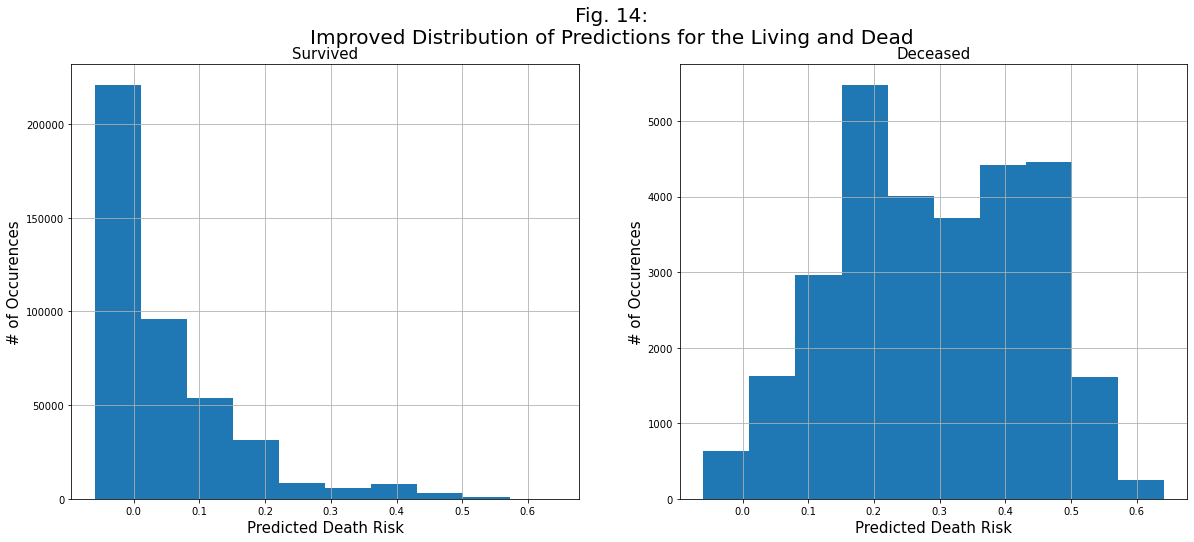

In [17]:
# Replace current prediction estimates (from the last regression)
df['LPM Prediction'] = res.predict(x)
deaths = df[df['death_yn'] == 1]
lives = df[df['death_yn'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Fig. 14:\nImproved Distribution of Predictions for the Living and Dead', fontsize = 20)
lives['LPM Prediction'].hist(ax = axs[0])
deaths['LPM Prediction'].hist(ax = axs[1])
for ax in axs:
    ax.set_xlabel('Predicted Death Risk', fontsize = 15)
    ax.set_ylabel('# of Occurences', fontsize = 15)

axs[0].set_title('Survived', fontsize = 15)
axs[1].set_title('Deceased', fontsize = 15)

plt.savefig('../Images/Regression/fig14_improved_prediction_distribution_post_FE.png')
plt.show()

The distributions have moved *even further* in the correct directions.